<a href="https://colab.research.google.com/github/SamTK174/MCAProject/blob/main/study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PREDICTING STUDENTS" PERFOEMANCE USING MACHINE LEARNING ALGORITHMS: A DATA DRIVEN APPROACH

ABOUT THE OPEN UNIVERSITY LEARNING ANALYTICS DATASET (OULAD)

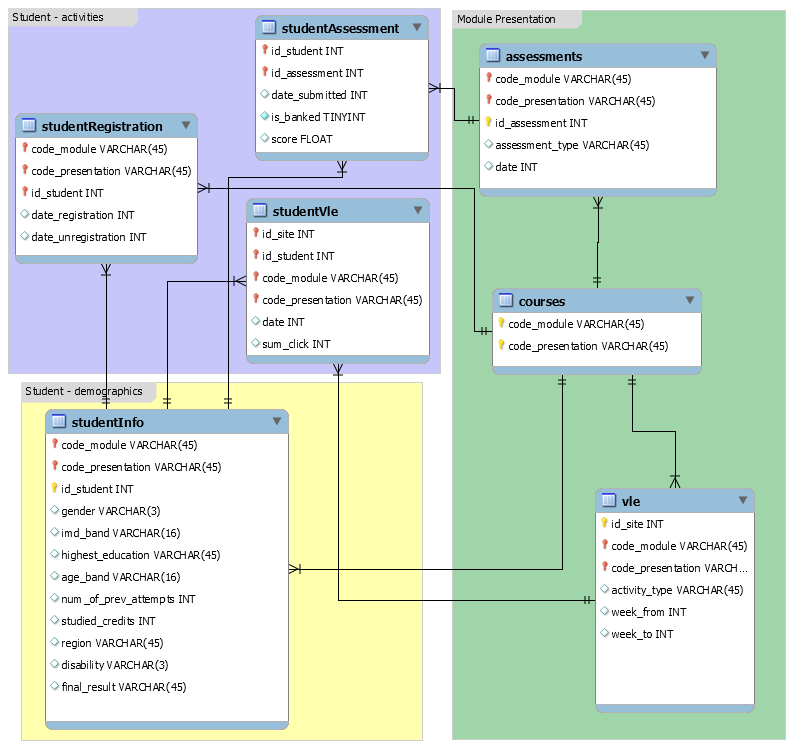

The OULAD dataset was downloaded from [here](https://figshare.com/articles/dataset/OULAD_Open_University_Learning_Analytics_Dataset/5081998/1?file=8606371) and upload to google drive for used in this project.



**RQ1. Can student performance be accurately predicted using demographic varibles only?**

    RQ1 a. What are the best demographic variables for predicting student performance?

    RQ1 b. Which models are best suited for predicting student performance using demographic variables only?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance

##**LOAD/READ DATA FROM CSV FILES (TABLES)**

---

Load/Read the Open University Learning Analytics Dataset(OULAD) csv files from google drive as DataFrames



In [ ]:
courses = pd.read_csv("/content/drive/MyDrive/OULAD/courses.csv")
assessments = pd.read_csv("/content/drive/MyDrive/OULAD/assessments.csv")
vle = pd.read_csv("/content/drive/MyDrive/OULAD/vle.csv")
student_info = pd.read_csv("/content/drive/MyDrive/OULAD/studentInfo.csv")
student_registration = pd.read_csv("/content/drive/MyDrive/OULAD/studentRegistration.csv")
student_assessment = pd.read_csv("/content/drive/MyDrive/OULAD/studentAssessment.csv")
student_vle = pd.read_csv("/content/drive/MyDrive/OULAD/studentVle.csv")

### **SUMMARY OF TABLES(DATAFRAMES)**
The table below shows the list of tables(DataFrames) with their shapes(number of rows and columns), rows with missing data, columns with missing data, and the list of columns

In [ ]:
# List of DataFrames (tables)
tables = [courses, assessments, vle, student_info, student_registration, student_assessment, student_vle]
table_names = ["courses", "assessments", "vle", "student_info", "student_registration", "student_assessment", "student_vle"]

# Initialize an empty list to store the summary data
summary_data = []

# Iterate over tables to extract the desired information
for table, table_name in zip(tables, table_names):
    # Number of rows and columns
    rows, columns = table.shape

    # Count of missing rows (rows with at least one missing value)
    missing_rows = table.isnull().any(axis=1).sum()

    # Count of missing columns (columns with at least one missing value)
    missing_columns = table.isnull().any(axis=0).sum()

    # Column names
    column_names = ", ".join(table.columns)

    # Append the information for this table to the summary data list
    summary_data.append({
        "Table Name": table_name,
        "Rows, Columns": f"{rows}, {columns}",
        "Missing Rows": missing_rows,
        "Missing Columns": missing_columns,
        "Column Names": column_names
    })

# Create a summary DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the summary DataFrame
display(summary_df)

,Table Name,"Rows, Columns",Missing Rows,Missing Columns,Column Names
0,courses,"22, 3",0,0,"code_module, code_presentation, module_present..."
1,assessments,"206, 6",11,1,"code_module, code_presentation, id_assessment,..."
2,vle,"6364, 6",5243,2,"id_site, code_module, code_presentation, activ..."
3,student_info,"32593, 12",1111,1,"code_module, code_presentation, id_student, ge..."
4,student_registration,"32593, 5",22560,2,"code_module, code_presentation, id_student, da..."
5,student_assessment,"173912, 5",173,1,"id_assessment, id_student, date_submitted, is_..."
6,student_vle,"10655280, 6",0,0,"code_module, code_presentation, id_student, id..."


### **DETAILS ABOUT EACH TABLE**


Structure of Courses Table

In [ ]:
# Check the structure of Courses DataFrame
print("\nCourses Dataframe Info\n")
display(courses.info())
print("\nCourses Dataframe Head \n")
display(courses.head())
print("\nCourses Dataframe Description\n")
display(courses.describe())


Courses Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


None


Courses Dataframe Head 



,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240



Courses Dataframe Description



,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


Structure of Assessments Table

In [ ]:
# Check the structure of Assessments DataFrame
print("\nAssessments Dataframe Info\n")
display(assessments.info())
print("\nAssessments Dataframe Head \n")
display(assessments.head())


Assessments Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


None


Assessments Dataframe Head 



,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


Structure of VLE Table

In [ ]:
# Check the structure of VLE DataFrame
print("\nVLE Dataframe Info\n")
display(vle.info())
print("\nVLE Dataframe Head \n")
display(vle.head())


VLE Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


None


VLE Dataframe Head 



,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


Structure of Student Info Table

In [ ]:
# Check the structure of Student Info DataFrame
print("\nStudent Info Dataframe Info\n")
display(student_info.info())
print("\nStudent Info Dataframe Head \n")
display(student_info.head())
print("\nStudent Info Dataframe Description\n")
display(student_info.describe())


Student Info Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


None


Student Info Dataframe Head 



,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass



Student Info Dataframe Description



,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


Structure of Student Registration Table

In [ ]:
# Check the structure of Student Registration DataFrame
print("\nStudent Registration Dataframe Info\n")
display(student_registration.info())
print("\nStudent Registration Dataframe Head \n")
display(student_registration.head())
print("\nStudent Registration Dataframe Description\n")
display(student_registration.describe())


Student Registration Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


None


Student Registration Dataframe Head 



,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN



Student Registration Dataframe Description



,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


Structure of Student Assessment Table

In [ ]:
# Check the structure of Student Assessment DataFrame
print("\nStudent Assessment Dataframe Info\n")
display(student_assessment.info())
print("\nStudent Assessment Dataframe Head \n")
display(student_assessment.head())
print("\nStudent Assessment Dataframe Description\n")
display(student_assessment.describe())


Student Assessment Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


None


Student Assessment Dataframe Head 



,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0



Student Assessment Dataframe Description



,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


Structure of Student VLE Table

In [ ]:
# Check the structure of Student VLE DataFrame
print("\nStudent VLE Dataframe Info\n")
display(student_vle.info())
print("\nStudent VLE Dataframe Head \n")
display(student_vle.head())


Student VLE Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


None


Student VLE Dataframe Head 



,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


## **EXPLORATORY DATA ANALYSIS**

---



The EDA is performed on only students of the  Module DDD with Presentations 2013J or 2014J


### **SELECT STUDENTS OF MODULE DDD WITH PRESENTATIONS 2013J OR 2014J**

In [ ]:
# Filter the student_info DataFrame for the "DDDD" module and "2013J" or "2014J" presentation
dddj_student_info = student_info[((student_info["code_module"] == "DDD") & (student_info["code_presentation"]=="2013J")) |
                                ((student_info["code_module"] == "DDD") & (student_info["code_presentation"]=="2014J"))].drop("code_module", axis=1)

# Display the new DataFrame
display(dddj_student_info)
display(dddj_student_info.info())

# Check the shape of the new DataFrame
display(f"Rows: {dddj_student_info.shape[0]}, Columns: {dddj_student_info.shape[1]}")

,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
14394,2013J,3733,M,South Region,HE Qualification,90-100%,55<=,0,60,N,Withdrawn
14395,2013J,8462,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn
14396,2013J,27417,M,South West Region,Lower Than A Level,60-70%,0-35,0,60,N,Withdrawn
14397,2013J,27935,F,East Anglian Region,Lower Than A Level,30-40%,0-35,0,60,Y,Fail
14398,2013J,28046,F,Yorkshire Region,HE Qualification,10-20,35-55,0,70,N,Fail
...,...,...,...,...,...,...,...,...,...,...,...
19358,2014J,2684043,M,East Anglian Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass
19359,2014J,2685863,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,90,N,Pass
19360,2014J,2689863,F,South West Region,A Level or Equivalent,30-40%,0-35,1,120,N,Pass
19361,2014J,2698109,M,East Anglian Region,Lower Than A Level,70-80%,0-35,0,60,Y,Withdrawn


<class 'pandas.core.frame.DataFrame'>
Index: 3741 entries, 14394 to 19362
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_presentation     3741 non-null   object
 1   id_student            3741 non-null   int64 
 2   gender                3741 non-null   object
 3   region                3741 non-null   object
 4   highest_education     3741 non-null   object
 5   imd_band              3580 non-null   object
 6   age_band              3741 non-null   object
 7   num_of_prev_attempts  3741 non-null   int64 
 8   studied_credits       3741 non-null   int64 
 9   disability            3741 non-null   object
 10  final_result          3741 non-null   object
dtypes: int64(3), object(8)
memory usage: 350.7+ KB


None

'Rows: 3741, Columns: 11'

**DROP ROWS WITH MISSING VALUES**

In [ ]:
dddj_student_info.dropna(inplace=True)

**DROP DUPLICATE STUDENT IDs**

In [ ]:
dddj_student_info = dddj_student_info.drop_duplicates(subset = ["id_student"])

**FILTER OUT STUDENTS WHO UNREGISTERED BEFORE BEGINNING OF PRESENTATION**

In [ ]:
#Filter out students who unregistered before presentation began
dddj_student_info = dddj_student_info[student_registration["date_unregistration"].isna() | (student_registration["date_unregistration"] >= 0)]

display(dddj_student_info.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3138 entries, 14395 to 19362
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_presentation     3138 non-null   object
 1   id_student            3138 non-null   int64 
 2   gender                3138 non-null   object
 3   region                3138 non-null   object
 4   highest_education     3138 non-null   object
 5   imd_band              3138 non-null   object
 6   age_band              3138 non-null   object
 7   num_of_prev_attempts  3138 non-null   int64 
 8   studied_credits       3138 non-null   int64 
 9   disability            3138 non-null   object
 10  final_result          3138 non-null   object
dtypes: int64(3), object(8)
memory usage: 294.2+ KB


<ipython-input-23-9b165a0ca037>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dddj_student_info = dddj_student_info[student_registration["date_unregistration"].isna() | (student_registration["date_unregistration"] >= 0)]


None

### **PLOT AN ATTRIBUTE DISTRIBUTION FROM THE SELECTED DATA**

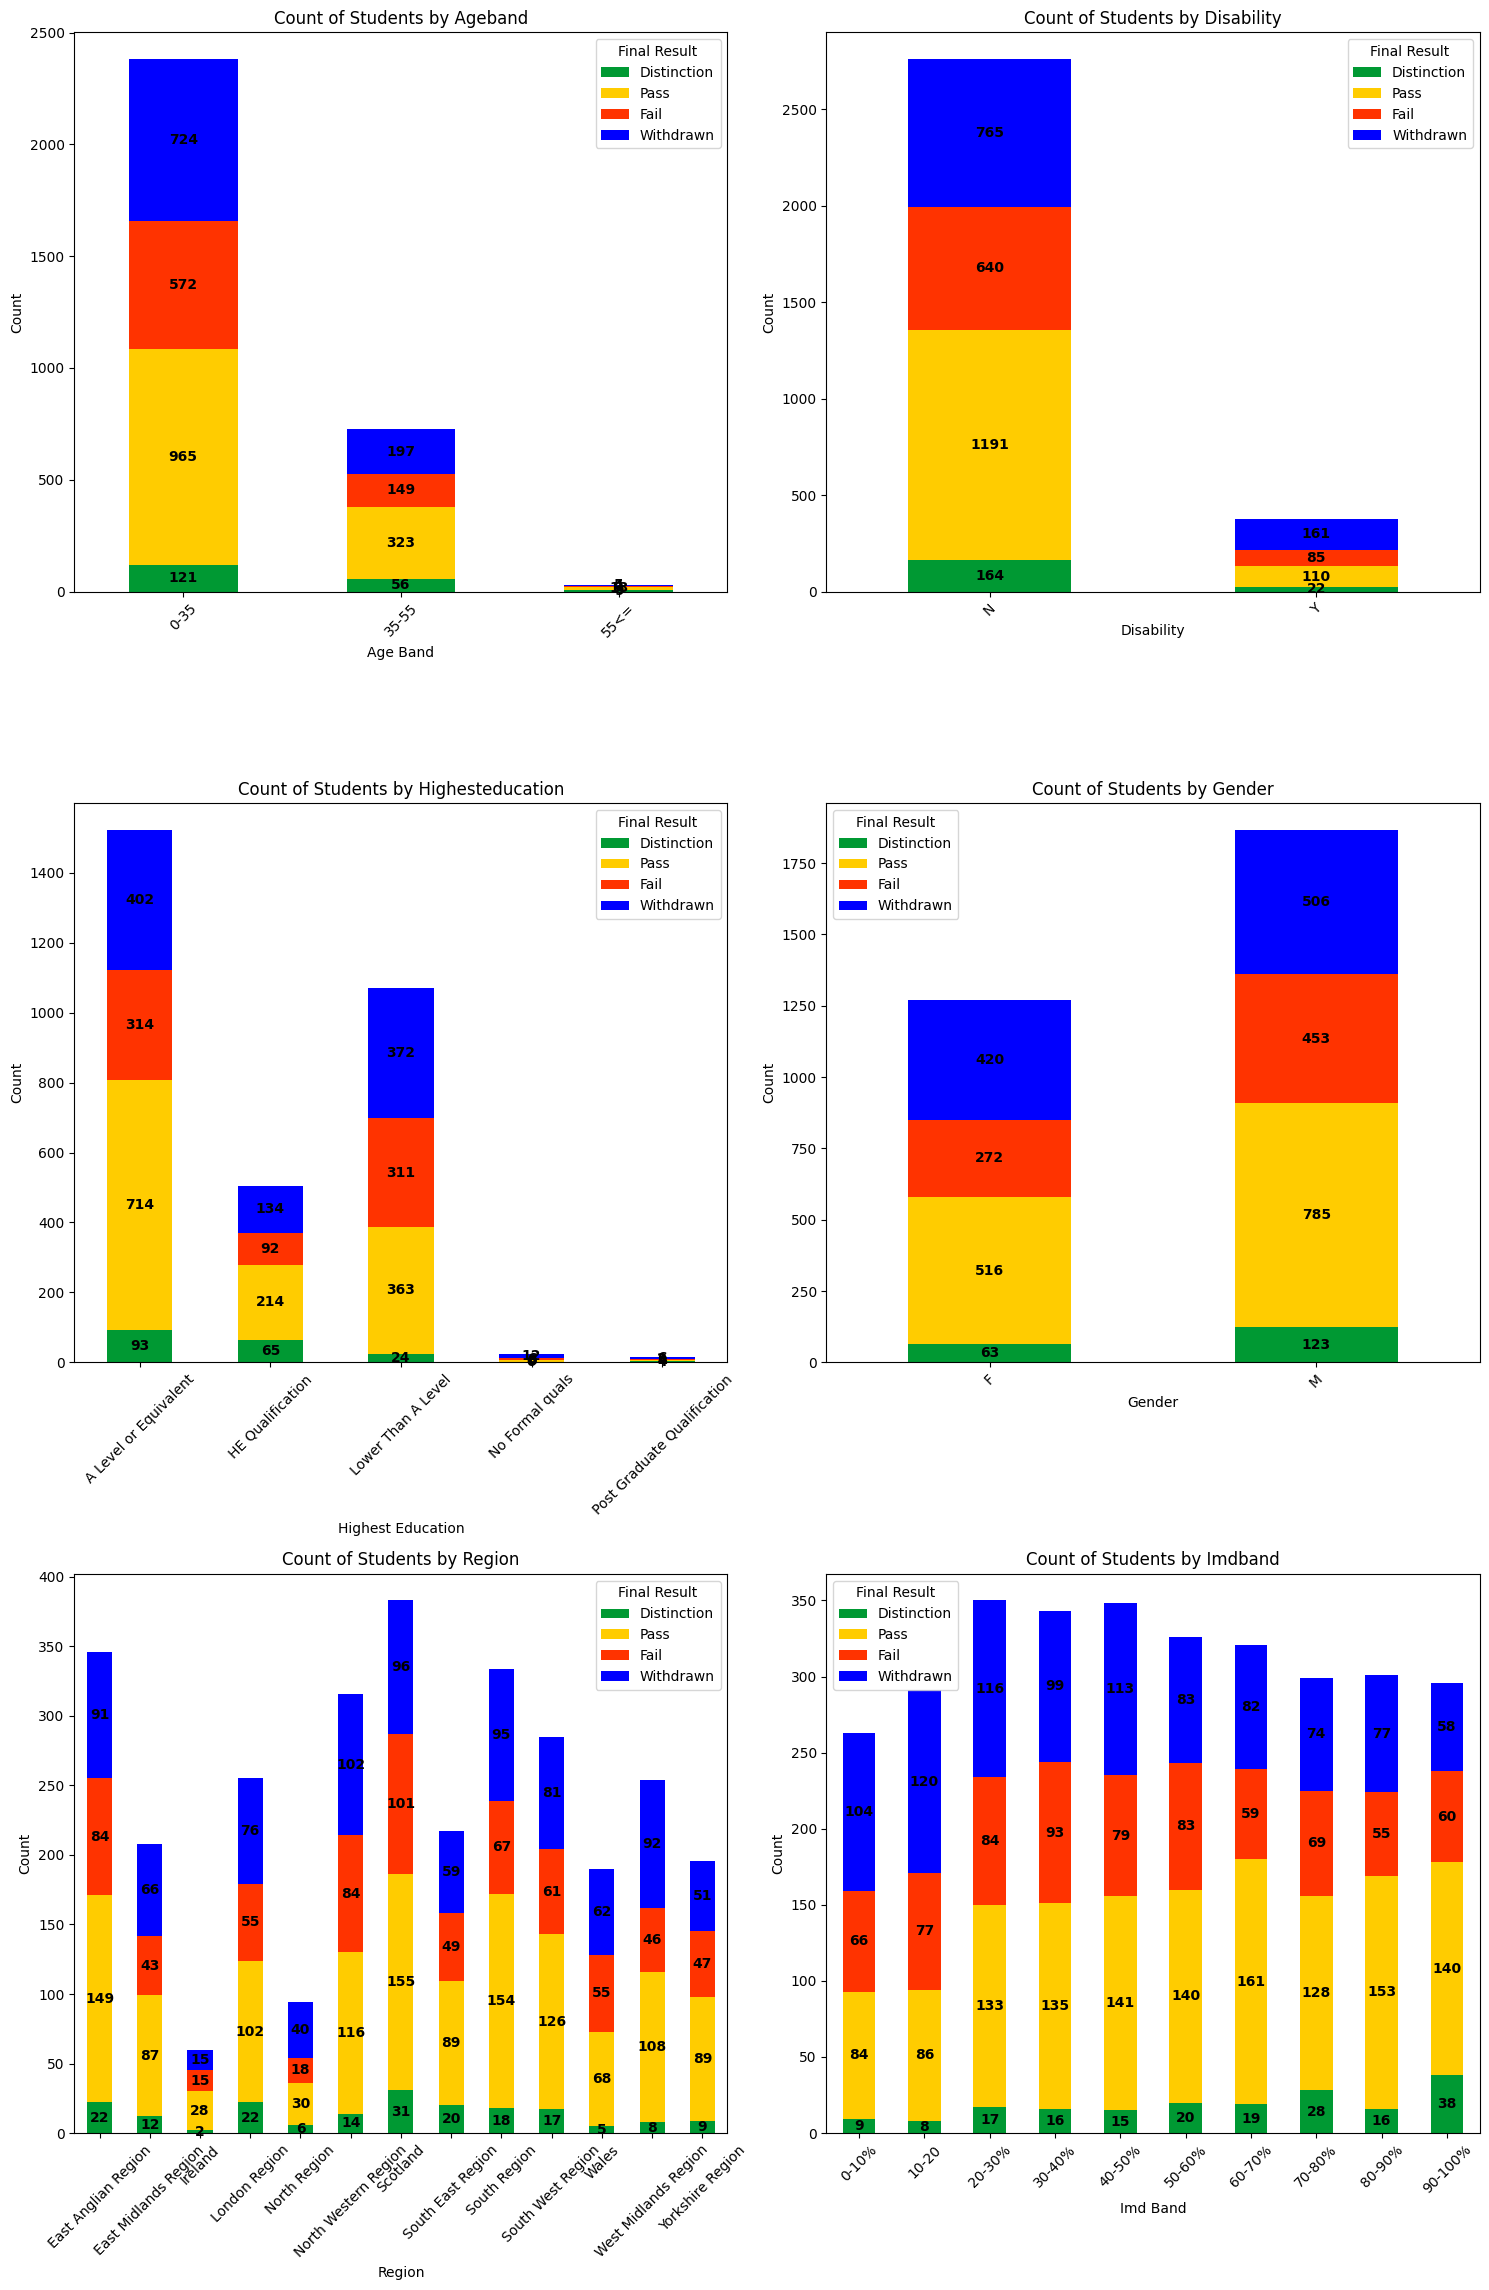

In [ ]:

# Ensure "final_result" is a categorical column with the desired order
final_result_order = ["Distinction", "Pass", "Fail", "Withdrawn"]
dddj_student_info["final_result"] = pd.Categorical(dddj_student_info["final_result"], categories=final_result_order, ordered=True)

# Define the columns to plot
columns_to_plot = ["age_band", "disability", "highest_education", "gender", "region", "imd_band"]

# Create a 3x2 subplot
fig, axes = plt.subplots(3, 2, figsize=(15, 23))

# Colors for the bars
colors = ["#009933", "#ffcc00", "#ff3300", "#0000ff"]

# Loop through the columns and plot each one
for ax, column in zip(axes.flatten(), columns_to_plot):
    grouped_data = dddj_student_info.groupby([column, "final_result"], observed=False).size().unstack()
    grouped_data = grouped_data.reindex(columns=final_result_order, fill_value=0)  # Ensure all categories are present

    # Plot stacked bar chart
    bars = grouped_data.plot(kind="bar", stacked=True, ax=ax, color=colors)


    # Add numbers on top of each bar segment
    for container in ax.containers:
        ax.bar_label(container, label_type="center", fmt="%d", fontsize=10, color="black", fontweight="bold")

    # Customize each subplot
    ax.set_title(f'Count of Students by {column.replace("_", "").title()}')
    ax.set_xlabel(column.replace("_", " ").title())
    ax.set_ylabel("Count")
    ax.legend(title="Final Result")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### **DESCRIPTIVE STATISTICS OF THE SELECTED DATA**

In [ ]:
display(dddj_student_info.describe())

,id_student,num_of_prev_attempts,studied_credits
count,3.138000e+03,3138.000000,3138.000000
mean,7.155680e+05,0.179095,85.463671
std,5.694020e+05,0.497795,35.822902
min,8.462000e+03,0.000000,60.000000
25%,4.932562e+05,0.000000,60.000000
50%,5.882295e+05,0.000000,60.000000
75%,6.526648e+05,0.000000,120.000000
max,2.716795e+06,5.000000,330.000000


**Frequencies and Percentages**

In [ ]:
# Function to calculate frequency and percentage
def frequency_percentage(df, columns):
    for col in columns:
        print(f"\nFrequency & Percentage for: {col}")
        freq = df[col].value_counts()  # Count occurrences
        percent = df[col].value_counts(normalize=True) * 100  # Compute percentage
        result = pd.DataFrame({"Frequency": freq, "Percentage": percent.round(2)})
        print(result)

# List of categorical variables
categorical_columns = ["gender", "region", "highest_education", "imd_band", "age_band", "disability", "final_result",
                       "num_of_prev_attempts", "studied_credits" ]

# Run function
frequency_percentage(dddj_student_info, categorical_columns)


Frequency & Percentage for: gender
        Frequency  Percentage
gender                       
M            1867        59.5
F            1271        40.5

Frequency & Percentage for: region
                      Frequency  Percentage
region                                     
Scotland                    383       12.21
East Anglian Region         346       11.03
South Region                334       10.64
North Western Region        316       10.07
South West Region           285        9.08
London Region               255        8.13
West Midlands Region        254        8.09
South East Region           217        6.92
East Midlands Region        208        6.63
Yorkshire Region            196        6.25
Wales                       190        6.05
North Region                 94        3.00
Ireland                      60        1.91

Frequency & Percentage for: highest_education
                             Frequency  Percentage
highest_education                                 

## **PREPROCESSING OF DATA**

### **FEATURING ENGINEERNIG**

**ENCODE CATEGORICAL DATA**

In [ ]:
# Encode categorical columns to numeric - One-Hot Encoding
oh_categorical_columns = ["gender", "region","disability"]
dddj_student_info_encoded = pd.get_dummies(dddj_student_info, columns=oh_categorical_columns)

# Convert the new one-hot encoded columns to float
encoded_columns = [col for col in dddj_student_info_encoded.columns if col.startswith(tuple(oh_categorical_columns))]
dddj_student_info_encoded[encoded_columns] = dddj_student_info_encoded[encoded_columns].astype(int)

In [ ]:
# Encode categorical columns to numeric
# Define the ordinal mapping for each column
ordinal_mappings = {
    "highest_education": {
        "No Formal quals": 0.0,
        "Lower Than A Level": 0.25,
        "A Level or Equivalent": 0.5,
        "HE Qualification": 0.75,
        "Post Graduate Qualification": 1.0,
    },
    "imd_band": {
        "0-10%": 0,
        "10-20": 1,
        "20-30%": 2,
        "30-40%": 3,
        "40-50%": 4,
        "50-60%": 5,
        "60-70%": 6,
        "70-80%": 7,
        "80-90%": 8,
        "90-100%": 9,
    },
    "final_result": {
        "Distinction": 1.0,
        "Pass": 1.0,
        "Fail": 0.0,
        "Withdrawn": 0.0,
    },
    "age_band": {
        "0-35": 0.0,
        "35-55": 0.5,
        "55<=": 1.0,
    },
  }

# Apply the ordinal mappings
for column, mapping in ordinal_mappings.items():
    dddj_student_info_encoded[column] = dddj_student_info_encoded[column].map(mapping).astype(float)

# Convert the "final_result" column to integer type after mapping
dddj_student_info_encoded["final_result"] = dddj_student_info_encoded["final_result"].astype(int)

In [ ]:
display(dddj_student_info_encoded)

,code_presentation,id_student,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,final_result,gender_F,gender_M,...,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,disability_N,disability_Y
14395,2013J,8462,0.75,3.0,1.0,0,90,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14396,2013J,27417,0.25,6.0,0.0,0,60,0,0,1,...,0,0,0,0,1,0,0,0,1,0
14397,2013J,27935,0.25,3.0,0.0,0,60,0,1,0,...,0,0,0,0,0,0,0,0,0,1
14398,2013J,28046,0.75,1.0,0.5,0,70,0,1,0,...,0,0,0,0,0,0,0,1,1,0
14399,2013J,29411,0.50,8.0,0.0,0,60,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19357,2014J,2681782,0.50,3.0,0.5,0,120,0,0,1,...,0,1,0,0,0,0,0,0,0,1
19358,2014J,2684043,0.25,6.0,0.0,0,120,1,0,1,...,0,0,0,0,0,0,0,0,1,0
19359,2014J,2685863,0.25,6.0,0.5,0,90,1,1,0,...,0,0,0,0,0,0,0,0,1,0
19360,2014J,2689863,0.50,3.0,0.0,1,120,1,1,0,...,0,0,0,0,1,0,0,0,1,0


**Drop the columns Code Presentaion, Student ID, Gender F, and Disability N**

In [ ]:
dddj_student_info_encoded = dddj_student_info_encoded.drop(columns=["code_presentation", "id_student","gender_F","disability_N",
                                                                    "num_of_prev_attempts", "studied_credits"], axis=1)

In [ ]:
dddj_student_info_encoded.reset_index(inplace=True)

In [ ]:
dddj_student_info_encoded = dddj_student_info_encoded.drop(columns=["index"], axis=1)
display(dddj_student_info_encoded)

,highest_education,imd_band,age_band,final_result,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,disability_Y
0,0.75,3.0,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.25,6.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.25,3.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.75,1.0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.50,8.0,0.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,0.50,3.0,0.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3134,0.25,6.0,0.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3135,0.25,6.0,0.5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3136,0.50,3.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
display(dddj_student_info_encoded.info())
display(dddj_student_info_encoded.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   highest_education            3138 non-null   float64
 1   imd_band                     3138 non-null   float64
 2   age_band                     3138 non-null   float64
 3   final_result                 3138 non-null   int64  
 4   gender_M                     3138 non-null   int64  
 5   region_East Anglian Region   3138 non-null   int64  
 6   region_East Midlands Region  3138 non-null   int64  
 7   region_Ireland               3138 non-null   int64  
 8   region_London Region         3138 non-null   int64  
 9   region_North Region          3138 non-null   int64  
 10  region_North Western Region  3138 non-null   int64  
 11  region_Scotland              3138 non-null   int64  
 12  region_South East Region     3138 non-null   int64  
 13  region_South Regio

None

,highest_education,imd_band,age_band,final_result,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,disability_Y
count,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.00000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000
mean,0.453713,4.503824,0.125398,0.473869,0.594965,0.110261,0.066284,0.01912,0.081262,0.029955,0.100701,0.122052,0.069152,0.106437,0.090822,0.060548,0.080943,0.062460,0.120459
std,0.180067,2.782663,0.227882,0.499396,0.490977,0.313265,0.248818,0.13697,0.273281,0.170491,0.300980,0.327398,0.253753,0.308446,0.287402,0.238538,0.272791,0.242028,0.325549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**SEPERATE TARGET DATA**

In [ ]:
#Copy the dataframe
dddj_student_info_final = dddj_student_info_encoded.copy()

#features
X = dddj_student_info_final.drop(columns=["final_result"], axis=1)
#target
y = dddj_student_info_final["final_result"]

**CHECKING FOR CORRELATION BETWEEN VARIABLES**

,highest_education,imd_band,age_band,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,disability_Y
highest_education,1.000000,0.070574,0.159948,-0.030040,-0.040884,-0.041780,-0.015804,0.050550,-0.027506,-0.052191,0.181024,-0.025852,-0.026057,-0.031156,0.054137,-0.043760,-0.019586,-0.091104
imd_band,0.070574,1.000000,0.111724,0.039983,0.130433,0.029100,-0.004374,-0.105417,-0.076841,-0.154229,0.024856,0.069826,0.200455,0.002156,-0.007072,-0.096996,-0.079873,-0.079332
age_band,0.159948,0.111724,1.000000,0.036701,0.020595,-0.006088,-0.030883,0.007798,-0.047485,-0.023823,0.027654,0.009860,0.032277,-0.025497,0.053801,-0.053080,-0.000451,-0.040394
gender_M,-0.030040,0.039983,0.036701,1.000000,-0.003851,0.008474,0.006172,-0.042090,0.000279,0.012924,-0.007678,-0.000275,-0.020457,-0.017090,0.018935,0.028273,0.030547,-0.059625
region_East Anglian Region,-0.040884,0.130433,0.020595,-0.003851,1.000000,-0.093795,-0.049150,-0.104696,-0.061862,-0.117800,-0.131256,-0.095950,-0.121497,-0.111263,-0.089370,-0.104472,-0.090863,0.010381
region_East Midlands Region,-0.041780,0.029100,-0.006088,0.008474,-0.093795,1.000000,-0.037200,-0.079240,-0.046821,-0.089159,-0.099343,-0.072621,-0.091956,-0.084211,-0.067641,-0.079071,-0.068771,0.023394
region_Ireland,-0.015804,-0.004374,-0.030883,0.006172,-0.049150,-0.037200,1.000000,-0.041523,-0.024535,-0.046720,-0.052057,-0.038054,-0.048187,-0.044128,-0.035445,-0.041434,-0.036037,-0.008776
region_London Region,0.050550,-0.105417,0.007798,-0.042090,-0.104696,-0.079240,-0.041523,1.000000,-0.052262,-0.099521,-0.110888,-0.081061,-0.102644,-0.093998,-0.075502,-0.088261,-0.076763,-0.031234
region_North Region,-0.027506,-0.076841,-0.047485,0.000279,-0.061862,-0.046821,-0.024535,-0.052262,1.000000,-0.058804,-0.065521,-0.047897,-0.060649,-0.055541,-0.044612,-0.052151,-0.045357,-0.013343
region_North Western Region,-0.052191,-0.154229,-0.023823,0.012924,-0.117800,-0.089159,-0.046720,-0.099521,-0.058804,1.000000,-0.124768,-0.091207,-0.115491,-0.105764,-0.084953,-0.099308,-0.086372,-0.026238


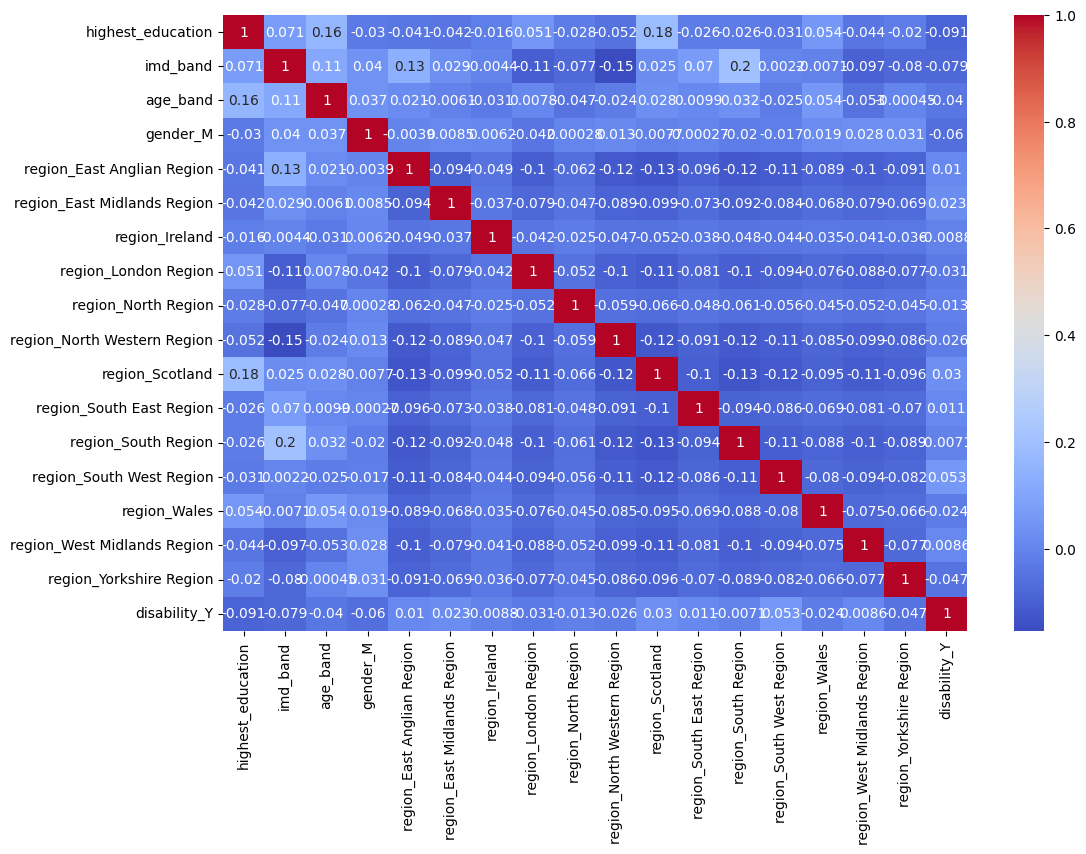

In [ ]:
# Correlation matrix to check for correlation
corr_matrix = X.corr()

display(corr_matrix)

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

Correlation is weak / moderate between variables/features. No action needed

**SPLIT TRAIN/TEST DATA AND NORMALISE**

In [ ]:
#Split Test/Train Data, and Normalise
random_STATE = 42  # Set a fixed random state for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X,y,
    test_size=0.2,  # Proportion of the data to be used for testing (20% here)
    random_state = random_STATE,  # For reproducibility
    stratify = y # Ensure the class distribution is preserved in the split
)

# Print or check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Initialize Scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Scale data for k-NN and SVM using StandardScaler
X_train_knn_svm = scaler_standard.fit_transform(X_train)
X_test_knn_svm = scaler_standard.transform(X_test)

# Scale data for Neural Network using MinMaxScaler
X_train_nn = scaler_minmax.fit_transform(X_train)
X_test_nn = scaler_minmax.transform(X_test)

X_train shape: (2510, 18)
X_test shape: (628, 18)
y_train shape: (2510,)
y_test shape: (628,)


**BASELINE MODEL TRAINING**
This is to obtain baseline performance

In [ ]:
#Using features scaled with standardscaler
# Initialize DummyClassifier with "most_frequent" strategy
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_knn_svm, y_train)

# Predictions
y_pred_s = dummy_clf.predict(X_test_knn_svm)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_s)
print(f"DummyClassifier (With StandardScaler) Baseline Accuracy: {accuracy:.2f}")

#Using features scaled with minmaxscaler
# Initialize DummyClassifier with "most_frequent" strategy
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_nn, y_train)

# Predictions
y_pred_n = dummy_clf.predict(X_test_nn)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_n)
print(f"DummyClassifier (With MinMaxScaler) Baseline Accuracy: {accuracy:.2f}")

DummyClassifier (With StandardScaler) Baseline Accuracy: 0.53
DummyClassifier (With MinMaxScaler) Baseline Accuracy: 0.53


**USE GRIDSEARCHCV TO FINE TUNE THE MODELS, THEN TRAIN THEM**

In [ ]:
# Define models and their hyperparameters for grid search
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=random_STATE),
    "Random Forest": RandomForestClassifier(random_state=random_STATE),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(max_iter=1000,random_state=random_STATE)
}

# Hyperparameter grids for each model
param_grids = {
    "Decision Tree": {"max_depth": [None, 10, 15, 20], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4], "class_weight":["balanced"], "criterion":["gini","entropy"], "ccp_alpha": [0.0, 0.01, 0.1]},
    "Random Forest": {"n_estimators": [100, 200, 500], "max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10], "class_weight":["balanced"], "min_samples_leaf": [1, 2, 4]},
    "KNN": {"n_neighbors": [3, 5, 10], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan", "minkowski"], "algorithm": ["auto", "ball_tree", "kd_tree"]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": ["scale", 0.1, 1, 10], "class_weight":["balanced"]},
    "Neural Network": {"hidden_layer_sizes": [(50, 50), (100,), (10, 50)], "learning_rate_init": [0.0001, 0.001], "activation": ["relu", "tanh"], "solver": ["lbfgs", "adam", "sgd"], "max_iter":[500, 1000, 1500], "early_stopping": [True]}
}

#Function to Tune Models
def tune_model(model, param_grid, X_train, y_train):
    """ Tunes a model using GridSearchCV and returns the best model & results. """

    grid_search = GridSearchCV(
        model, param_grid, cv=5, scoring="f1_weighted", n_jobs=-1, verbose=1
    )
    grid_search.fit(X_train, y_train)

    print(f"\nBest Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best CV Score: {grid_search.best_score_:.4f}")

    results_df = pd.DataFrame(grid_search.cv_results_)  # Convert CV results into DataFrame
    return grid_search.best_estimator_, results_df

#Function to Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    """ Generates and plots a confusion matrix. """

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return cm

Models trained on StandardScaler Scaled data


Tuning Decision Tree...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters for DecisionTreeClassifier: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV Score: 0.5690

 Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       330
           1       0.52      0.52      0.52       298

    accuracy                           0.55       628
   macro avg       0.54      0.54      0.54       628
weighted avg       0.55      0.55      0.55       628



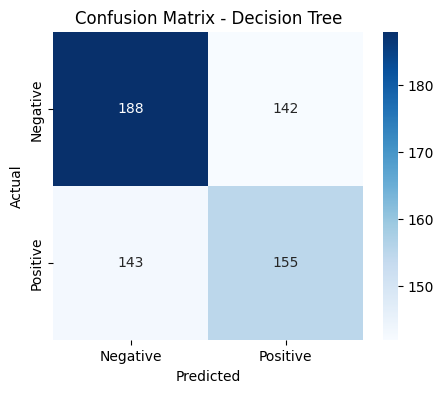


Tuning Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Parameters for RandomForestClassifier: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}
Best CV Score: 0.5933

 Random Forest Performance:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       330
           1       0.58      0.60      0.59       298

    accuracy                           0.61       628
   macro avg       0.60      0.60      0.60       628
weighted avg       0.61      0.61      0.61       628



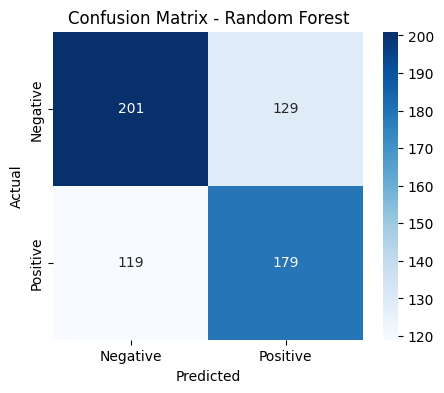


Tuning KNN...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best Parameters for KNeighborsClassifier: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best CV Score: 0.5642

 KNN Performance:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59       330
           1       0.53      0.47      0.50       298

    accuracy                           0.55       628
   macro avg       0.55      0.55      0.55       628
weighted avg       0.55      0.55      0.55       628



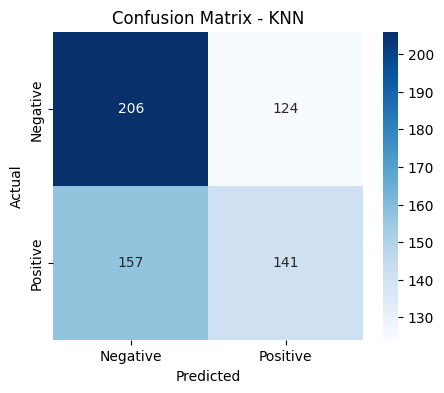


Tuning SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters for SVC: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
Best CV Score: 0.5887

 SVM Performance:
              precision    recall  f1-score   support

           0       0.62      0.61      0.61       330
           1       0.57      0.59      0.58       298

    accuracy                           0.60       628
   macro avg       0.60      0.60      0.60       628
weighted avg       0.60      0.60      0.60       628



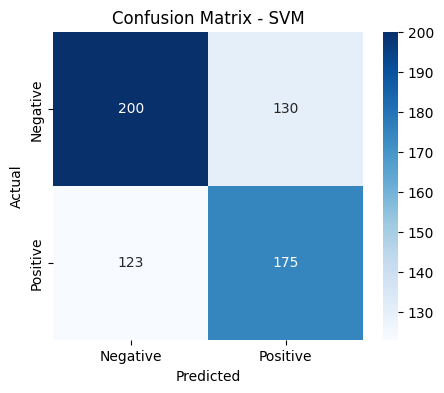


Tuning Neural Network...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters for MLPClassifier: {'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'}
Best CV Score: 0.5819

 Neural Network Performance:
              precision    recall  f1-score   support

           0       0.60      0.71      0.65       330
           1       0.59      0.47      0.52       298

    accuracy                           0.59       628
   macro avg       0.59      0.59      0.58       628
weighted avg       0.59      0.59      0.59       628



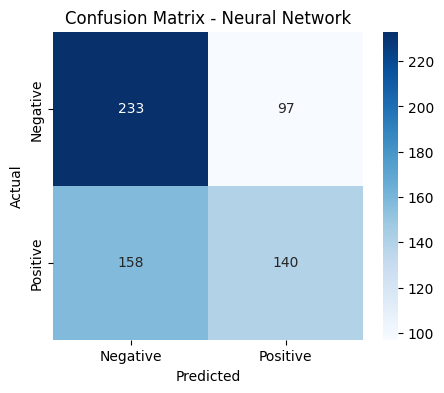


Model Performance Comparison:
                Weighted F1-Score
Random Forest            0.605316
SVM                      0.597313
Neural Network           0.587977
KNN                      0.550088
Decision Tree            0.546140


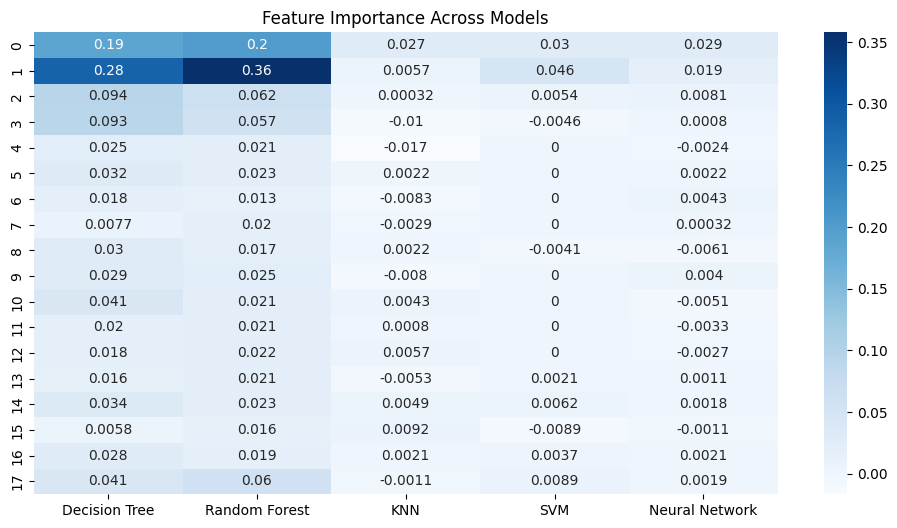

In [ ]:
#Train & Evaluate Models
best_models = {}
cv_results = {}
evaluation_results = {}
feature_importance = {}

for model_name, model in models.items():
    print(f"\nTuning {model_name}...")
    best_model, results = tune_model(model, param_grids[model_name], X_train_knn_svm, y_train)

    best_models[model_name] = best_model
    cv_results[model_name] = results

    # Predict on Test Set
    y_pred = best_model.predict(X_test_knn_svm)

    # Display Classification Report
    print(f"\n {model_name} Performance:")
    print(classification_report(y_test, y_pred))

    # Compute & Plot Confusion Matrix
    cm = plot_confusion_matrix(y_test, y_pred, model_name)

    # Store evaluation results
    evaluation_results[model_name] = {
        "Confusion Matrix": cm,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
    }

    #Feature Importance:
    if hasattr(best_model, "feature_importances_"):
        feature_importance[model_name] = best_model.feature_importances_
    else:
        # Use Permutation Importance for non-tree models
        perm_importance = permutation_importance(best_model, X_test_knn_svm, y_test, n_repeats=10, random_state=42)
        feature_importance[model_name] = perm_importance.importances_mean

#Compare Model Performance
comparison_df = pd.DataFrame({
    model: [evaluation_results[model]["Classification Report"]["weighted avg"]["f1-score"]]
    for model in evaluation_results
}, index=["Weighted F1-Score"])

print("\nModel Performance Comparison:")
print(comparison_df.T.sort_values(by="Weighted F1-Score", ascending=False))

#Convert Feature Importance to DataFrame
feature_importance_df = pd.DataFrame(feature_importance, index=pd.DataFrame(X_train_knn_svm).columns)

#Plot Feature Importance (for all models)
plt.figure(figsize=(12, 6))
sns.heatmap(feature_importance_df, annot=True, cmap="Blues")
plt.title("Feature Importance Across Models")
plt.show()

In [ ]:
# Extract relevant metrics from evaluation_results
evaluation_data = {
    model: {
        "Precision": evaluation_results[model]["Classification Report"]["weighted avg"]["precision"],
        "Recall": evaluation_results[model]["Classification Report"]["weighted avg"]["recall"],
        "F1-Score": evaluation_results[model]["Classification Report"]["weighted avg"]["f1-score"],
        "Accuracy": evaluation_results[model]["Classification Report"]["accuracy"],
    }
    for model in evaluation_results
}

# Convert to DataFrame
evaluation_df = pd.DataFrame(evaluation_data).T  # Transpose for better format

# Sort by F1-Score (descending)
evaluation_df = evaluation_df.sort_values(by="F1-Score", ascending=False)

# Display the DataFrame
print("\nModel Evaluation Summary:")
print(evaluation_df)


Model Evaluation Summary:
                Precision    Recall  F1-Score  Accuracy
Random Forest    0.605843  0.605096  0.605316  0.605096
SVM              0.597640  0.597134  0.597313  0.597134
Neural Network   0.593445  0.593949  0.587977  0.593949
KNN              0.550687  0.552548  0.550088  0.552548
Decision Tree    0.546105  0.546178  0.546140  0.546178


Models trained on MinMaxScaler Scaled data


Tuning Decision Tree...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters for DecisionTreeClassifier: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV Score: 0.5690

 Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       330
           1       0.52      0.52      0.52       298

    accuracy                           0.55       628
   macro avg       0.54      0.54      0.54       628
weighted avg       0.55      0.55      0.55       628



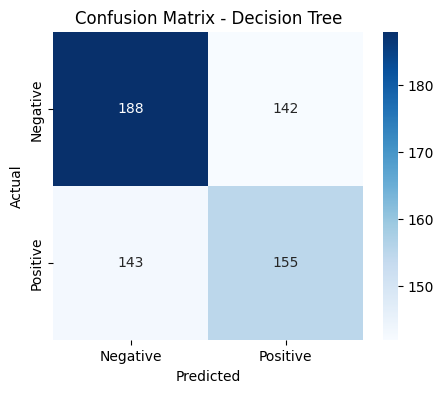


Tuning Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Parameters for RandomForestClassifier: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}
Best CV Score: 0.5925

 Random Forest Performance:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       330
           1       0.58      0.60      0.59       298

    accuracy                           0.61       628
   macro avg       0.60      0.60      0.60       628
weighted avg       0.61      0.61      0.61       628



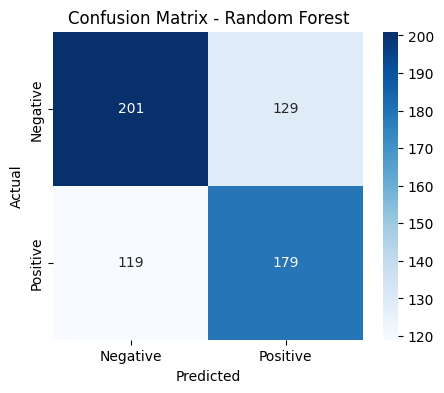


Tuning KNN...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best Parameters for KNeighborsClassifier: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best CV Score: 0.5645

 KNN Performance:
              precision    recall  f1-score   support

           0       0.55      0.60      0.58       330
           1       0.51      0.47      0.49       298

    accuracy                           0.54       628
   macro avg       0.53      0.53      0.53       628
weighted avg       0.53      0.54      0.53       628



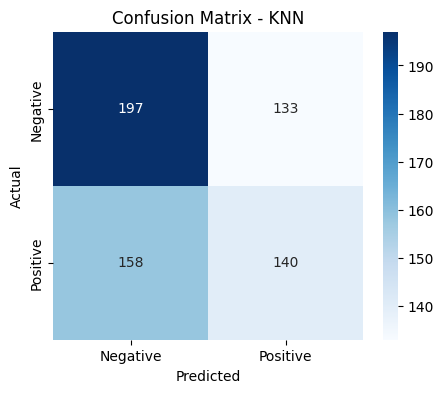


Tuning SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters for SVC: {'C': 1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Score: 0.5881

 SVM Performance:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       330
           1       0.58      0.60      0.59       298

    accuracy                           0.61       628
   macro avg       0.60      0.60      0.60       628
weighted avg       0.61      0.61      0.61       628



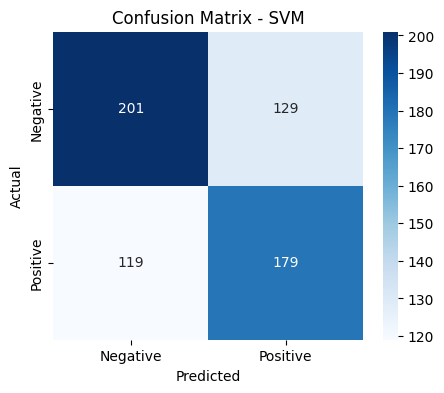


Tuning Neural Network...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters for MLPClassifier: {'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'}
Best CV Score: 0.5811

 Neural Network Performance:
              precision    recall  f1-score   support

           0       0.60      0.72      0.65       330
           1       0.59      0.46      0.52       298

    accuracy                           0.60       628
   macro avg       0.60      0.59      0.59       628
weighted avg       0.60      0.60      0.59       628



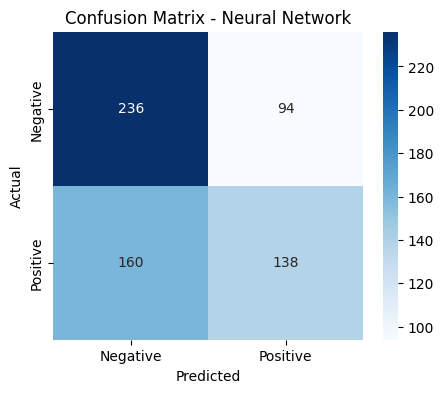


Model Performance Comparison:
                Weighted F1-Score
Random Forest            0.605316
SVM                      0.605316
Neural Network           0.588743
Decision Tree            0.546140
KNN                      0.534936


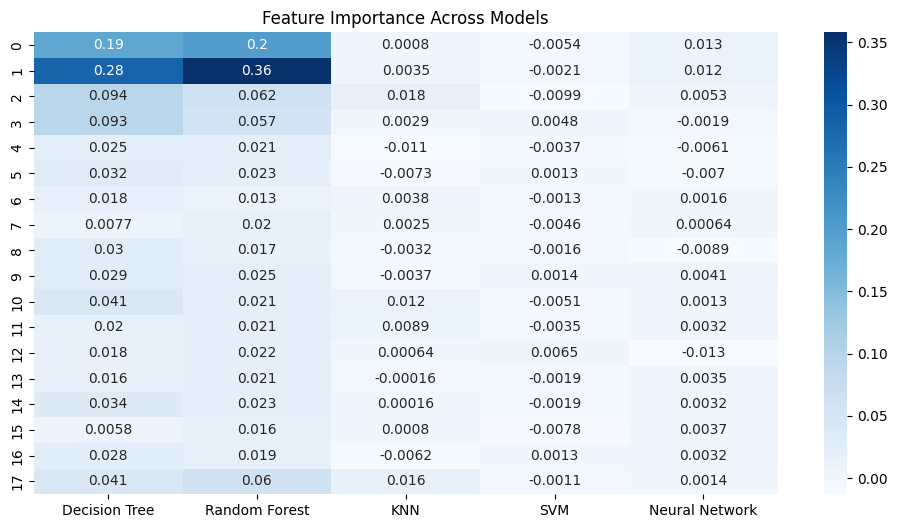

In [ ]:
#Train & Evaluate Models
best_models = {}
cv_results = {}
evaluation_results = {}

for model_name, model in models.items():
    print(f"\nTuning {model_name}...")
    best_model, results = tune_model(model, param_grids[model_name], X_train_nn, y_train)

    best_models[model_name] = best_model
    cv_results[model_name] = results

    # Predict on Test Set
    y_pred = best_model.predict(X_test_nn)

    # Display Classification Report
    print(f"\n {model_name} Performance:")
    print(classification_report(y_test, y_pred))

    # Compute & Plot Confusion Matrix
    cm = plot_confusion_matrix(y_test, y_pred, model_name)

    # Store evaluation results
    evaluation_results[model_name] = {
        "Confusion Matrix": cm,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
    }

    #Feature Importance:
    if hasattr(best_model, "feature_importances_"):
        feature_importance[model_name] = best_model.feature_importances_
    else:
        # Use Permutation Importance for non-tree models
        perm_importance = permutation_importance(best_model, X_test_knn_svm, y_test, n_repeats=10, random_state=42)
        feature_importance[model_name] = perm_importance.importances_mean

#Compare Model Performance
comparison_df = pd.DataFrame({
    model: [evaluation_results[model]["Classification Report"]["weighted avg"]["f1-score"]]
    for model in evaluation_results
}, index=["Weighted F1-Score"])

print("\nModel Performance Comparison:")
print(comparison_df.T.sort_values(by="Weighted F1-Score", ascending=False))

#Convert Feature Importance to DataFrame
feature_importance_df = pd.DataFrame(feature_importance, index=pd.DataFrame(X_train_knn_svm).columns)

#Plot Feature Importance (for all models)
plt.figure(figsize=(12, 6))
sns.heatmap(feature_importance_df, annot=True, cmap="Blues")
plt.title("Feature Importance Across Models")
plt.show()

In [ ]:
# Extract relevant metrics from evaluation_results
evaluation_data = {
    model: {
        "Precision": evaluation_results[model]["Classification Report"]["weighted avg"]["precision"],
        "Recall": evaluation_results[model]["Classification Report"]["weighted avg"]["recall"],
        "F1-Score": evaluation_results[model]["Classification Report"]["weighted avg"]["f1-score"],
        "Accuracy": evaluation_results[model]["Classification Report"]["accuracy"],
    }
    for model in evaluation_results
}

# Convert to DataFrame
evaluation_df = pd.DataFrame(evaluation_data).T  # Transpose for better format

# Sort by F1-Score (descending)
evaluation_df = evaluation_df.sort_values(by="F1-Score", ascending=False)

# Display the DataFrame
print("\nModel Evaluation Summary:")
print(evaluation_df)


Model Evaluation Summary:
                Precision    Recall  F1-Score  Accuracy
Random Forest    0.605843  0.605096  0.605316  0.605096
SVM              0.605843  0.605096  0.605316  0.605096
Neural Network   0.595422  0.595541  0.588743  0.595541
Decision Tree    0.546105  0.546178  0.546140  0.546178
KNN              0.534948  0.536624  0.534936  0.536624


### **CREATE ENSEMBLE MODEL USING BEST TWO MODELS**

In [ ]:
#Build an ensemble from the best two models
# Define individual models
best_svm = SVC(C=1, class_weight="balanced", gamma=0.1, kernel="rbf", probability=True)
#best_nn = MLPClassifier(activation="tanh", early_stopping=True, hidden_layer_sizes=(50,50), learning_rate_init=0.001, max_iter=1000, solver="adam", random_state=random_STATE)
best_rf = RandomForestClassifier(class_weight="balanced", max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=500, random_state=random_STATE)

#Ensemble 1
# Train classifiers
best_svm.fit(X_train_nn, y_train)
#best_nn.fit(X_train_nn, y_train)
best_rf.fit(X_train_nn, y_train)

# Get accuracy scores
acc1 = accuracy_score(y_test, best_svm.predict(X_test_nn))
#acc2 = accuracy_score(y_test, best_nn.predict(X_test_nn))
acc3 = accuracy_score(y_test, best_rf.predict(X_test_nn))

# Normalize weights to sum to 1
weights = np.array([acc1, acc3])
print(weights)
weights = weights / weights.sum()

# Create the ensemble1 model using VotingClassifier (soft voting)
ensemble1 = VotingClassifier(estimators=[
    ("svm", best_svm),
    #("nn", best_nn),
    ("rf", best_rf)
], voting="soft",
  weights = weights)

# Train the ensemble model
ensemble1.fit(X_train_nn, y_train)

# Make predictions on the test set
y_pred = ensemble1.predict(X_test_nn)


# Evaluate the ensemble model"s Performance
y_pred = ensemble1.predict(X_test_nn)
print(f'\nThe Ensemble"s(MinMaxScaler Applied To Data) Performance:')
print(classification_report(y_test, y_pred))


#Ensemble 2
# Train classifiers
best_svm.fit(X_train_knn_svm, y_train)
#best_nn.fit(X_train_knn_svm, y_train)
best_rf.fit(X_train_knn_svm, y_train)

# Get accuracy scores
acc1 = accuracy_score(y_test, best_svm.predict(X_test_knn_svm))
#acc2 = accuracy_score(y_test, best_nn.predict(X_test_knn_svm))
acc3 = accuracy_score(y_test, best_rf.predict(X_test_knn_svm))

# Normalize weights to sum to 1
weights = np.array([acc1, acc3])
print(weights)
weights = weights / weights.sum()


# Create the ensemble1 model using VotingClassifier (soft voting)
ensemble2 = VotingClassifier(estimators=[
    ("svm", best_svm),
    #("nn", best_nn),
    ("rf", best_rf)
], voting="soft",
    weights = weights)

# Train the ensemble model
ensemble2.fit(X_train_knn_svm, y_train)

# Make predictions on the test set
y_pred = ensemble2.predict(X_test_knn_svm)


# Evaluate the ensemble model"s Performance
y_pred = ensemble2.predict(X_test_knn_svm)
print(f'\nThe Ensemble"s(StandardScaler Applied To Data) Performance:')
print(classification_report(y_test, y_pred))

[0.60509554 0.60509554]

The Ensemble"s(MinMaxScaler Applied To Data) Performance:
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       330
           1       0.59      0.54      0.56       298

    accuracy                           0.60       628
   macro avg       0.60      0.60      0.60       628
weighted avg       0.60      0.60      0.60       628

[0.59394904 0.60509554]

The Ensemble"s(StandardScaler Applied To Data) Performance:
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       330
           1       0.60      0.56      0.58       298

    accuracy                           0.61       628
   macro avg       0.61      0.61      0.61       628
weighted avg       0.61      0.61      0.61       628

